# Notebook to make Figure 7

In [1]:
# Import necessary packages & set-up plotting aesthetics

import numpy as np 
import importlib
import json
import h5ify
import os
import tqdm
import imageio
from scipy.stats import pearsonr

import matplotlib
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt
from matplotlib import style
style.use('../utils/plotting.mplstyle')
from matplotlib.lines import Line2D

import seaborn as sns
sns.set_palette('coolwarm')

from matplotlib.colors import LinearSegmentedColormap
cmap = LinearSegmentedColormap.from_list("my_cmap", ['C3','C5', 'C0'])

import sys
sys.path.append('../utils')
import plotting_functions as pf

# where data is saved
data_dir = '../data/different_extrinsic_angles/'

### Setup

Load data

In [2]:
# Load in posteriors 
posteriors_dict = h5ify.load(data_dir+'posteriors_full_different_angles.h5')
maxL_posterior = h5ify.load(data_dir+'../real_and_maxL_GW190521/GW190521_maxL.h5')

# Load in the prior
prior_dict = h5ify.load(data_dir+'../real_and_maxL_GW190521/prior.h5')

# # Load in the maxL parameters
maxL_params = h5ify.load(data_dir+'../real_and_maxL_GW190521/GW190521_maxL_parameters.h5')

# Load in JSDs and pre-merger strain values
JSD_dict = h5ify.load(data_dir+'JSDs_different_angles.h5')
premerger_strain_dict = h5ify.load(data_dir+'pre_merger_strain_amp_different_angles.h5')
strain_and_peak_dict = h5ify.load(data_dir+'strain_peaks_different_angles.h5')

Set up plotting aesthetics

In [3]:
# Parameters to plot
phases = [0.0, 0.3, 0.6, 0.8, 1.0, 1.2, 1.4, 1.7, 2.0, 2.5, 3.0]
psis = ['0.00', '0.15', '0.25', '0.35', '0.50', '0.60', '0.70', '0.75', '0.80', '0.85', '0.90', '0.95']
iotas = [0.0, 0.5, 1.0, 1.25, 1.5, 1.75, 2.0, 2.25, 2.5, 3.0]

params_to_plot = {
    'iota':iotas, 
    'psi':psis, 
    'phase':phases,
}

labels = {
    'phase':r'$\varphi$', 
    'psi':r'$\psi$', 
    'iota':r'$\iota$'
}

hist_kws = dict(bins=30, density=True, histtype='step')

maxL_p_values = {'phase':1.3, 'psi':2.3, 'iota':1.16}

### Make Figure

<>:62: SyntaxWarning: invalid escape sequence '\c'
<>:96: SyntaxWarning: invalid escape sequence '\h'
<>:62: SyntaxWarning: invalid escape sequence '\c'
<>:96: SyntaxWarning: invalid escape sequence '\h'
/local/simona.miller/ipykernel_2312865/2154578843.py:62: SyntaxWarning: invalid escape sequence '\c'
  axes[0].set_ylabel('JSD between full $\chi_p$ posterior and prior')
/local/simona.miller/ipykernel_2312865/2154578843.py:96: SyntaxWarning: invalid escape sequence '\h'
  axes[1].set_xlabel('ratio of peak $|\hat h|$ in pre-merger cycle to overall peak of $|\hat h|$')
/local/simona.miller/ipykernel_2312865/2154578843.py:35: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['0', '0.25', '0.5', '0.75', '1'])
/local/simona.miller/ipykernel_2312865/2154578843.py:35: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

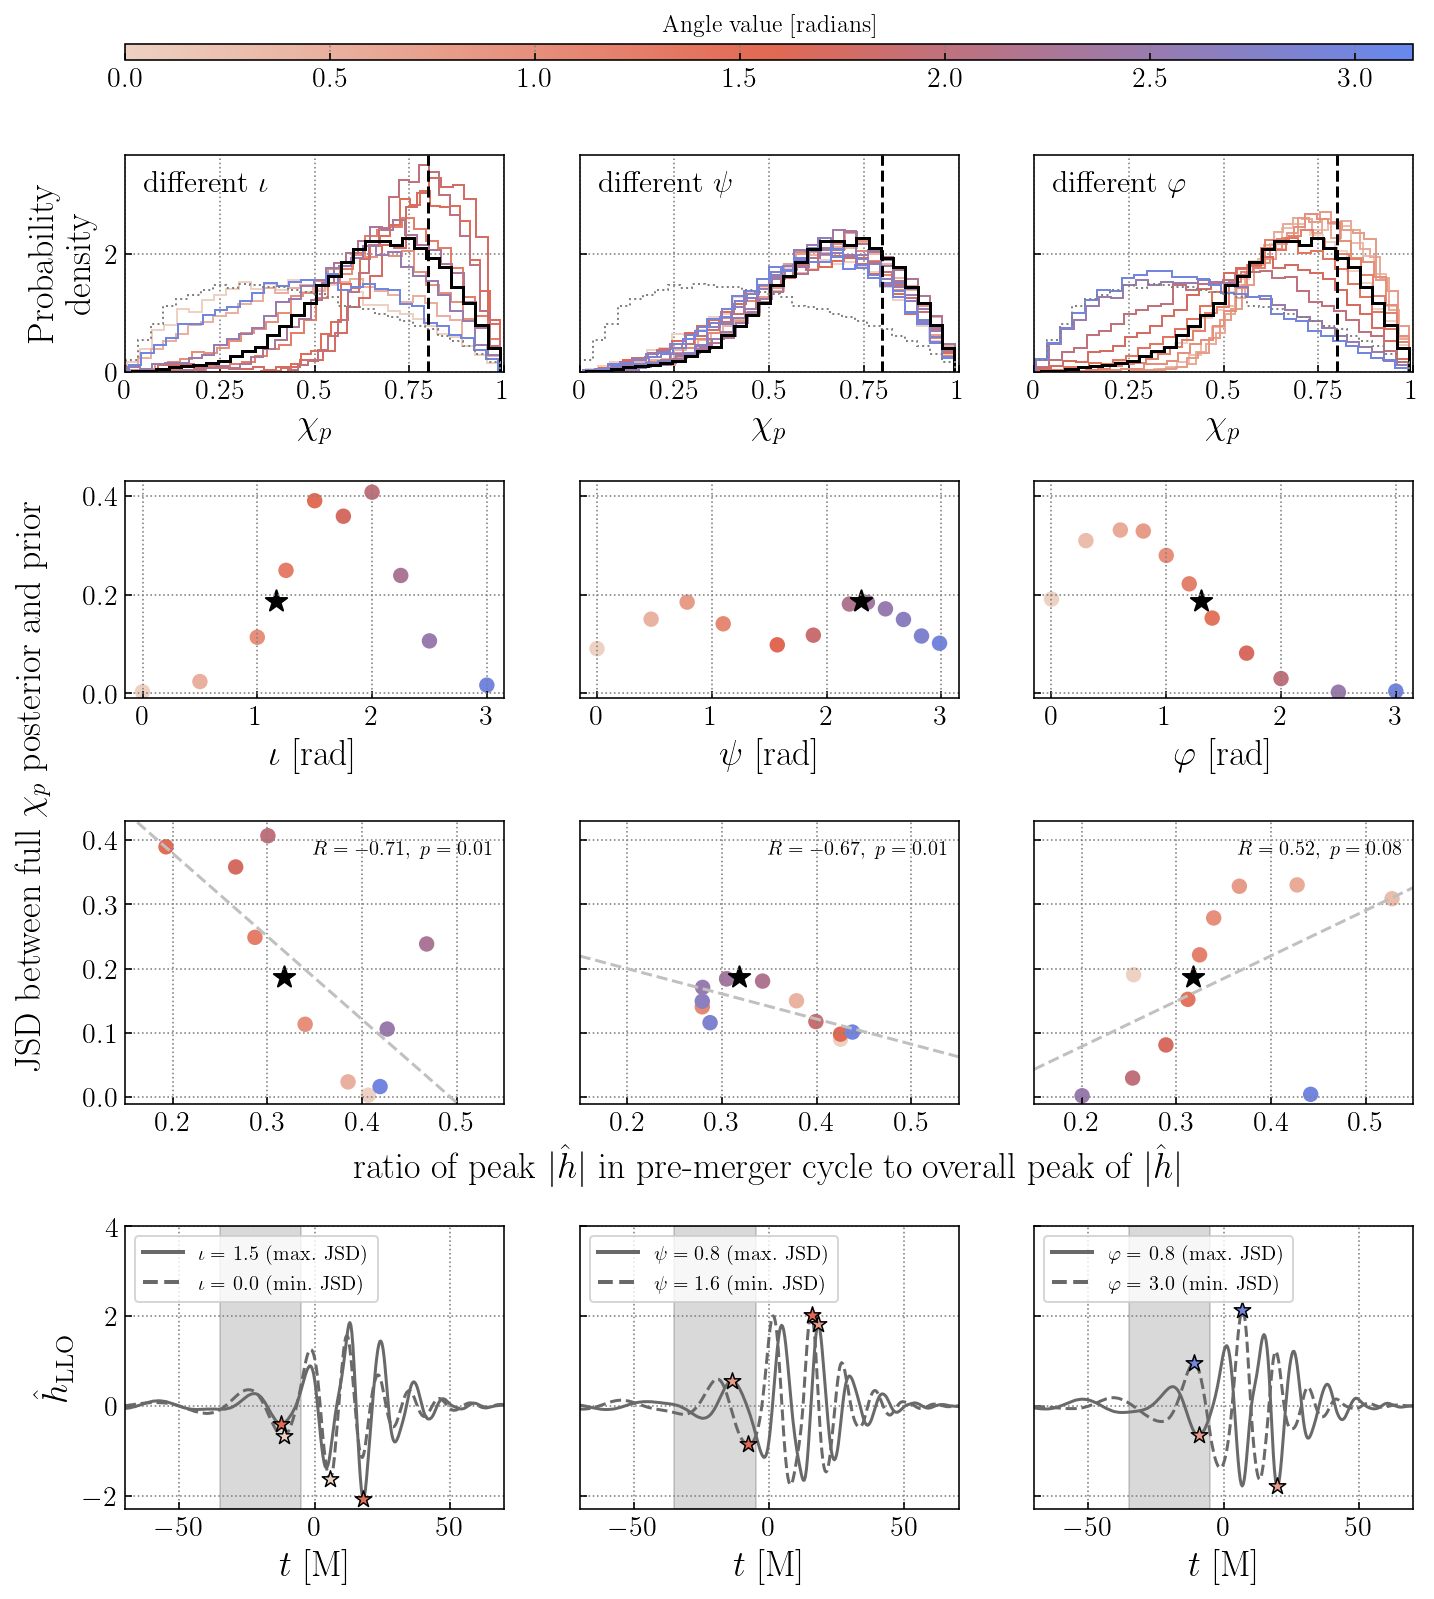

In [4]:
importlib.reload(pf)

fig, _axes = plt.subplots(nrows=4, ncols=len(params_to_plot), figsize=(pf.DEFAULT_FIG_WIDTH, 11), sharey='row', sharex='row')

'''
ROW 1
'''

axes = _axes[0]

for ax, p_name in zip(axes, params_to_plot.keys()): 
    
    params = params_to_plot[p_name]
    
    for i, p in enumerate(params): 
        
        k = pf.get_key(p, p_name)
        post = posteriors_dict[k]['chi_p_m100M']
        
        ax.hist(post, color=pf.get_color(p, p_name, cmap), lw=1, **hist_kws)
        
    # add maxL posteriors
    ax.hist(maxL_posterior['full']['chi_p_m100M'], color='k', lw=1.5, **hist_kws)
    
    # add prior
    ax.hist(prior_dict['chi_p_m100M'], color = 'gray', ls=':', lw=1, **hist_kws)
    
    # add injected value 
    ax.axvline(maxL_params['chi_p_m100M'], color='k', ls='--')
    
    ax.text(0.05, 3.05, f'different {labels[p_name]}', fontsize=15)
    ax.set_xlabel(r'$\chi_p$')
    ax.set_xlim(0,1)
    
    ax.set_xticklabels(['0', '0.25', '0.5', '0.75', '1'])
    
axes[0].set_ylabel('Probability\ndensity')

'''
ROW 2
'''

axes = _axes[1]

for ax, p_name in zip(axes, params_to_plot.keys()): 
    
    # scatterplot with JSD
    if p_name=='psi':
        x_vals = [float(x) * np.pi for x in params_to_plot[p_name]]
    else: 
        x_vals = params_to_plot[p_name]
        
    colors = [pf.get_color(x, p_name, cmap) for x in params_to_plot[p_name]]
    ax.scatter(x_vals, JSD_dict[p_name], c = colors, s=45)
    
    # maxL point 
    ax.scatter(maxL_p_values[p_name], JSD_dict['maxL'], color='k', marker='*', s=125)
    
    ax.set_xlabel(labels[p_name] + ' [rad]')
    ax.set_ylim(-0.01, 0.43)
    
axes[0].set_ylabel('JSD between full $\chi_p$ posterior and prior')
axes[0].yaxis.set_label_coords(-0.2, -0.4)  # move label to encompass this row and the row below


'''
ROW 3
'''

axes = _axes[2]

for ax, p_name in zip(axes, params_to_plot.keys()): 
        
    colors = [pf.get_color(x, p_name, cmap) for x in params_to_plot[p_name]]
    
    # scatterplot
    ax.scatter(premerger_strain_dict[p_name],  JSD_dict[p_name], c = colors, s=45)
    
    # maxL point 
    ax.scatter(premerger_strain_dict['maxL'], JSD_dict['maxL'], color='k', marker='*', s=125)
    ax.set_ylim(-0.01, 0.43)
    
    # line of best fit
    r_arr = [*premerger_strain_dict[p_name], premerger_strain_dict['maxL']]
    jsd_arr = [*JSD_dict[p_name], JSD_dict['maxL']]
    xlims = (0.15, 0.55)
    xs, ys = pf.fit_line_to_data(r_arr, jsd_arr, grid_x=np.linspace(*xlims,10))
    ax.plot(xs,ys, color='silver', ls='--')
    ax.set_xlim(*xlims)
    
    # also get Pearson R value and associated p-value
    corr, p_value = pearsonr(r_arr, jsd_arr)
    ax.text(0.97, 0.93, fr'$R = {np.round(corr,2)},~p = {np.round(p_value,2)}$', 
            transform=ax.transAxes, horizontalalignment='right', verticalalignment='top')
    
axes[1].set_xlabel('ratio of peak $|\hat h|$ in pre-merger cycle to overall peak of $|\hat h|$')
        
plt.subplots_adjust(hspace=0.5)

# make bottom row taller
for ax in axes:
    pos = ax.get_position()  # Get current position
    ax.set_position([pos.x0, pos.y0 - 0.05, pos.width, pos.height * 1.3])  # Move lower and increase height
    
    
'''
ROW 4
'''

axes = _axes[3]

## panel 1: inclination

linestyles = ['-', '--']
color = 'dimgray'
scp_kws = dict(marker='*', s=75, zorder=5, edgecolors='k', linewidth=0.75)

for ls, i, m in zip(linestyles, [1.5, 0.0], [' (max. JSD)', ' (min. JSD)']): 
    
    k = pf.get_key(i, 'iota')
    axes[0].plot(strain_and_peak_dict[k]['times_M'], strain_and_peak_dict[k]['strain_wh'], 
                 lw=1.5, color=color, ls=ls, label=k.replace('iota', r'$\iota=$')+m)
    axes[0].scatter([strain_and_peak_dict[k]['t_insp'], strain_and_peak_dict[k]['t_overall']],
                    [strain_and_peak_dict[k]['s_insp'], strain_and_peak_dict[k]['s_max']], 
                    color=pf.get_color(i, 'iota', cmap), **scp_kws)
    
## panel 2: polarizaion
for ls, i, l in zip(linestyles, [0.25, 0.50], [r'$\psi = 0.8$ (max. JSD)', r'$\psi = 1.6$ (min. JSD)']): 
    
    k = pf.get_key(i, 'psi')
    axes[1].plot(strain_and_peak_dict[k]['times_M'], strain_and_peak_dict[k]['strain_wh'], 
                 lw=1.5, color=color, ls=ls, label=l)
    axes[1].scatter([strain_and_peak_dict[k]['t_insp'], strain_and_peak_dict[k]['t_overall']],
                    [strain_and_peak_dict[k]['s_insp'], strain_and_peak_dict[k]['s_max']], 
                    color=pf.get_color(i, 'psi', cmap), **scp_kws)
    
## panel 3: phase 
for ls, i, m in zip(linestyles,[0.8, 3.0], [' (max. JSD)', ' (min. JSD)']): 
    
    k = pf.get_key(i, 'phase')
    axes[2].plot(strain_and_peak_dict[k]['times_M'], strain_and_peak_dict[k]['strain_wh'], 
                 lw=1.5, color=color, ls=ls, label=k.replace('phase', r'$\varphi=$')+m)
    axes[2].scatter([strain_and_peak_dict[k]['t_insp'], strain_and_peak_dict[k]['t_overall']],
                    [strain_and_peak_dict[k]['s_insp'], strain_and_peak_dict[k]['s_max']], 
                    color=pf.get_color(i, 'phase', cmap), **scp_kws)
    
for ax in axes: 
    ax.axvspan(-5, -35, alpha=0.15, color='k', zorder=0)
    ax.set_xlim(-70, 70)
    ax.set_ylim(-2.3, 4)
    leg = ax.legend(fontsize=10, loc='upper left', handlelength=2, frameon=True)
    for l in leg.get_lines():
        l.set_linewidth(2)
    
    ax.set_xlabel('$t$ [M]')
    
    pos = ax.get_position()  # Get current position
    ax.set_position([pos.x0, pos.y0 - 0.1, pos.width, pos.height*1.3])  # Move lower

axes[0].set_ylabel(r'$\hat h_{\rm LLO}$') 

'''
Add colorbar to top
'''
cax = plt.axes((0.125, 0.94, 0.775, 0.01)) #(left, bottom, width, height)
cnorm = matplotlib.colors.Normalize(vmin=0, vmax=np.pi)
plt.colorbar(matplotlib.cm.ScalarMappable(norm=cnorm, cmap=cmap), cax=cax, orientation='horizontal')
cax.set_title('Angle value [radians]')

plt.savefig('figure_07.png', dpi=300, bbox_inches='tight')
plt.show()